In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm

In [6]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

In [7]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [8]:
##Task 4

In [9]:
#a) For the Median value of owner-occupied homes. Provide a boxplot

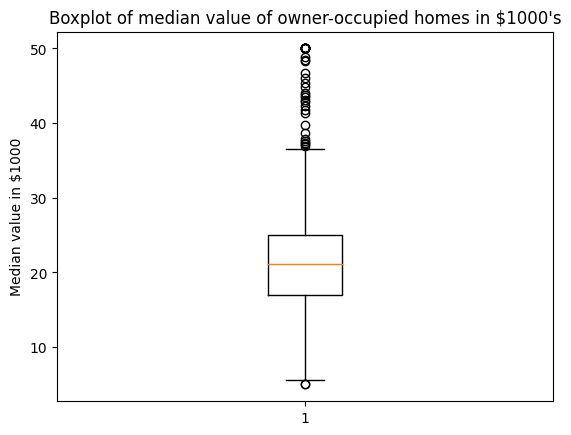

In [10]:
plt.boxplot(boston_df['MEDV'])
plt.title("Boxplot of median value of owner-occupied homes in $1000's")
plt.ylabel("Median value in $1000")
plt.show()

In [11]:
#In this boxplot we can see the median value of the whole data in the MEDV ie. median value of owner-occupied homes is around $23,000. 
#Whereas minimun is around $4000 and maximum is around $38,000. The lower quartile and upper quartile value from the box plot are around
#$18,000 and $25,000. And above $38,000 in the boxplot are outliers.

In [12]:
#b) A bar plot for the Charles river variable

In [13]:
chas_counts = boston_df['CHAS'].value_counts()

chas_counts.head()

0.0    471
1.0     35
Name: CHAS, dtype: int64

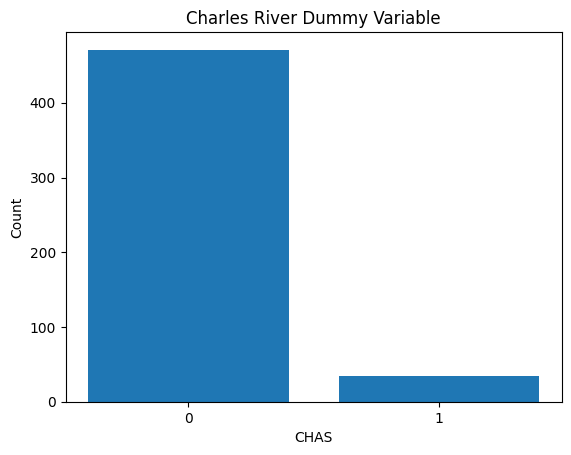

In [14]:
plt.bar(chas_counts.index, chas_counts.values)
plt.title('Charles River Dummy Variable')
plt.xlabel('CHAS')
plt.ylabel('Count')
plt.xticks(chas_counts.index) 
plt.show()

In [15]:
chas_counts.values


array([471,  35], dtype=int64)

In [16]:
chas_counts.index

Float64Index([0.0, 1.0], dtype='float64')

In [17]:
#c) A boxplot for the MEDV variable vs the AGE variable. 
###(Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

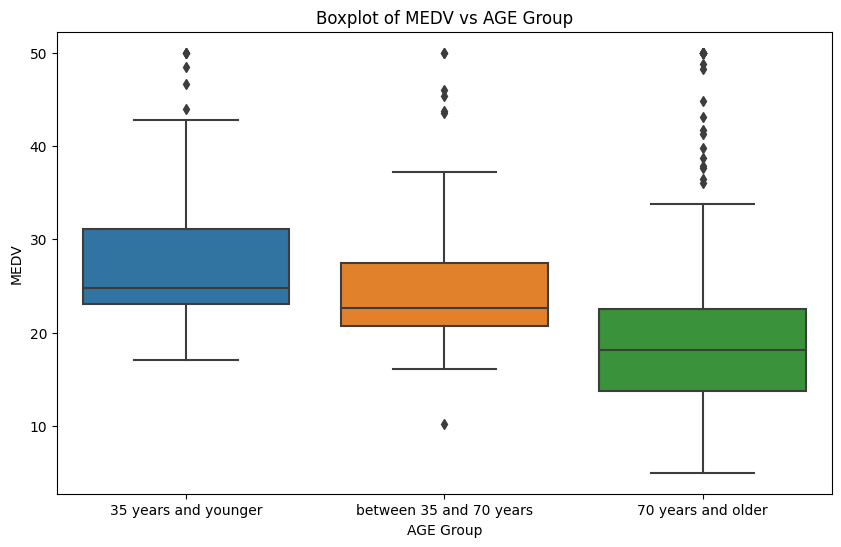

In [18]:
age_bins = [0, 35, 70, float('inf')]
age_labels = ['35 years and younger', 'between 35 and 70 years', '70 years and older']
boston_df['AGE_Group'] = pd.cut(boston_df['AGE'], bins=age_bins, labels=age_labels, include_lowest=True)

# Create a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='AGE_Group', y='MEDV', data=boston_df)
plt.title('Boxplot of MEDV vs AGE Group')
plt.xlabel('AGE Group')
plt.ylabel('MEDV')
plt.show()





In [19]:
#here we can see in the above boxplots for each age groups, the highest median value of owner-occupied homes is for the age group 35 years and younger, 
#and the least is of the age group 70 years and older.

In [20]:
#d) A scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. 
#What can you say about the relationship?

Text(0, 0.5, 'INDUS')

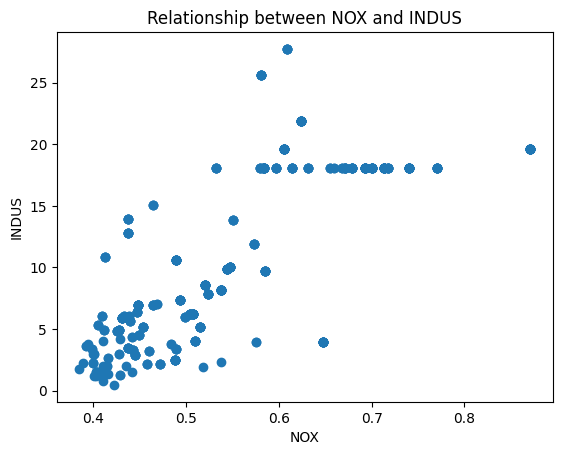

In [64]:
plt.scatter(data=boston_df, x='NOX', y='INDUS')
plt.title('Relationship between NOX and INDUS')
plt.xlabel('NOX')
plt.ylabel('INDUS')

In [22]:
#there is not much clear relationship between these two variables. If we were to see some then we can say that it partially gives positive linear relationship ie. 
#Higher the concentration of Nitric Oxide higher the proportion of non-retail business acres per town. 


In [23]:
 #e) A histogram for the pupil to teacher ratio variable

In [24]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,AGE_Group
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0,between 35 and 70 years
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6,70 years and older
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7,between 35 and 70 years
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4,between 35 and 70 years
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2,between 35 and 70 years


Text(0.5, 0, 'PTRATIO')

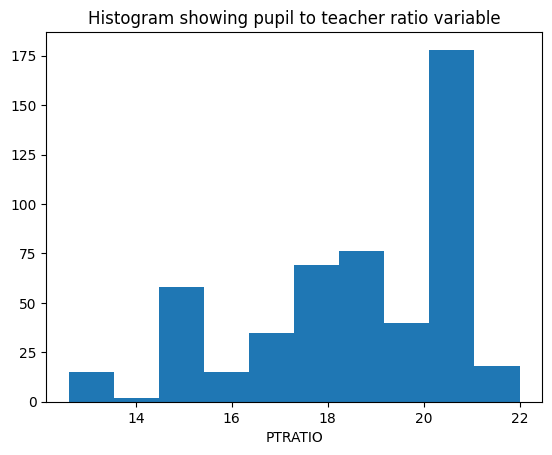

In [65]:
plt.hist(data=boston_df, x='PTRATIO')
plt.title('Histogram showing pupil to teacher ratio variable')
plt.xlabel('PTRATIO')

In [26]:
## Task 5
#Use the appropriate tests to answer the questions provided.
# For each of the following questions;

# Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

# Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

# Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

# What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

# Be sure to:

# State your hypothesis.

# Use α = 0.05

# Perform the test Statistics.

# State the conclusion from the test.

In [27]:
#a) Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)
#For this let the,
#alpha is given as 0.05.
#Null hypothesis: There is not significant difference in median value of houses bounded by the Charles river or not.
#Alternative hypothesis: There is significant difference in median value of houses bounded by the Charles river or not.

In [28]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,AGE_Group
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0,between 35 and 70 years
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6,70 years and older
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7,between 35 and 70 years
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4,between 35 and 70 years
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2,between 35 and 70 years


In [29]:
a1=boston_df['CHAS']
a2=boston_df['MEDV']

In [30]:
a1

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
501    0.0
502    0.0
503    0.0
504    0.0
505    0.0
Name: CHAS, Length: 506, dtype: float64

In [31]:
print(a1.var())

0.06451297303643481


In [32]:
print(a2.var())

84.5867235940986


In [33]:
#Independent sample t-test
ttest,p_value=stats.ttest_ind(a1,a2,equal_var=False)

In [34]:
ttest

-54.9210289745203

In [35]:
p_value

2.752650575837329e-215

In [36]:
if (p_value <= 0.05):
    print("Reject null hypothesis")
else:
    print("Accept null hypothesis")

Reject null hypothesis


In [37]:
#Since we have the p_value smaller than 0.05 ie p_value<=0.05. We reject null hypothesis and accept alternative hypothesis ie. there is significant difference
#in median value of houses bounded by the Charles river or not.

In [38]:
#b)Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)
#For this:
#Null hypothesis: No, there is not a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 
#Alternative hypothesis: Yes, there is a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 

In [39]:
f_statistics, p_value = stats.f_oneway(boston_df['MEDV'][boston_df['AGE_Group'] == '35 years and younger'],
                               boston_df['MEDV'][boston_df['AGE_Group'] == 'between 35 and 70 years'],
                               boston_df['MEDV'][boston_df['AGE_Group'] == '70 years and older'])

In [40]:
#performing ANOVA test
f_statistics, p_value = stats.f_oneway(boston_df['MEDV'][boston_df['AGE_Group'] == '35 years and younger'],
                               boston_df['MEDV'][boston_df['AGE_Group'] == 'between 35 and 70 years'],
                               boston_df['MEDV'][boston_df['AGE_Group'] == '70 years and older'])


In [41]:
print(p_value)

1.7105011022702984e-15


In [42]:
#since p_value is smaller than 0.05, so we reject null hypothesis.So we can say that there is a difference
#in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 

In [43]:
#C)Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of 
#non-retail business acres per town? (Pearson Correlation)
#For this:
#Null hypothesis: yes, we can conclude that there is no relationship between Nitric oxide concentrations and proportion of 
#non-retail business acres per town.
#Alternative hypothesis: No, we cannot conclude that there is no relationship between Nitric oxide concentrations and proportion of 
#non-retail business acres per town.

In [49]:
#boston_df.drop('Unnamed: 0', axis=1, inplace=True)

In [50]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,AGE_Group
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0,between 35 and 70 years
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6,70 years and older
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7,between 35 and 70 years
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4,between 35 and 70 years
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2,between 35 and 70 years


In [51]:
#plotting the scatterplot for the variables Nitric oxide concentration(NOX) and 
#proportion of non-retail business acres per town(INDUS)

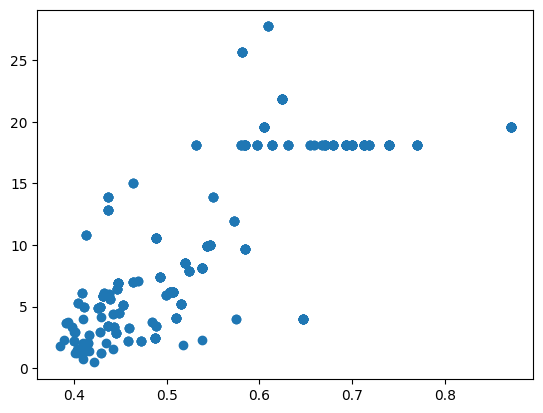

In [52]:
plt.scatter(x=boston_df['NOX'], y=boston_df['INDUS'])

In [55]:
#performing pearson correlation test
stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

(0.7636514469209157, 7.913361061233745e-98)

In [57]:
#here the p_value is 7.9113e-98 which is less than 0.05. So we reject null hypothesis. 
#We can say that there is a statistically significant relationship between Nitric oxide concentrations and the proportion of 
#non-retail business acres per town.

In [ ]:
#d) What is the impact of an additional weighted distance  to the five Boston employment centres on the 
#median value of owner occupied homes? (Regression analysis)
#For this:
#Null hypothesis: There is no impact of an additional weighted distance  to the five Boston employment centres on the 
#median value of owner occupied homes.
#Alternate hypothesis: There is impact of an additional weighted distance  to the five Boston employment centres on the 
#median value of owner occupied homes.

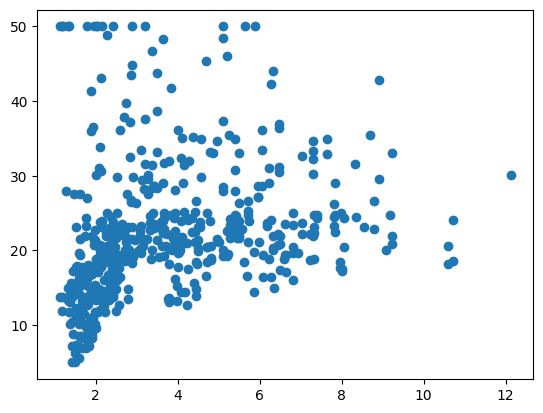

In [58]:
plt.scatter(x=boston_df['DIS'], y=boston_df['MEDV'])

In [61]:
#Applying regression analysis

#X is the independent variable
X=boston_df['DIS']
#Y is the dependent variable
Y=boston_df['MEDV']

#Adding a constant term
X=sm.add_constant(X)

#Defining the OLS regression model
model=sm.OLS(Y,X).fit()

#Generating predictions
predictions=model.predict(X)

#Displaying model summary
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Tue, 14 Nov 2023   Prob (F-statistic):           1.21e-08
Time:                        11:31:59   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#The t-values for both the intercept and 'DIS' are large, and their corresponding p-values are very small 0.000(close to zero).
#Hence, we reject null hypothesis.
#This suggests that both the intercept and the coefficient for 'DIS' are statistically significant.
#The model suggests a statistically significant positive relationship between the 'DIS' variable and the response variable 'MEDV', with an intercept that is 
#significantly different from zero.